In [1]:
# load data
import pandas as pd
combined = pd.read_pickle('../../combined')

# for plotting 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline

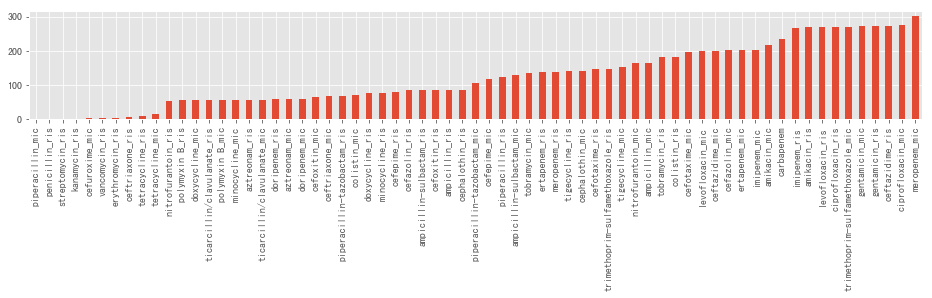

In [2]:
### LET'S SEE HOW MUCH DATA WE HAVE

# count non-nan data
a = combined.count(axis = 0, numeric_only = False)
a = a.iloc[407:] # these are mic/ris
sortedCountMIC = a.sort_values()

# visualize what kind of data we have most
sortedCountMIC.plot(kind = 'bar', figsize = (16,2))

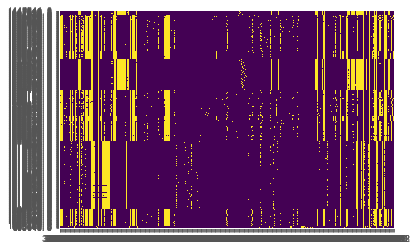

In [3]:
# visualize all gene
geneset = combined.iloc[:,0:406]

plt.pcolor(geneset)
plt.yticks(np.arange(0.5, len(geneset.index), 1), geneset.index)
plt.xticks(np.arange(0.5, len(geneset.columns), 1), geneset.columns)

# adjust figure size
fig_size = mpl.pyplot.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

# show a clear dilimiation between species

# we would use `ceftazidmine_ris`, `ciprofloxacin_ris`, `levofloxacin_ris`, `imipenem_ris` for expriment cause we have most abundant data
## group by drug class: 
- cipro and levo belongs to FQ family
- cefa and imipenum belongs to penicillin family

# Visualization: group by MIC
- `combined[DrugName_ris]` is categorical, with label R(resistant), I(intermediate), S(suspecable)

# absence presence pattern

In [21]:
# plotting function
def clean_df(anti):
    # remove data that imipenem_ris = NaN, and sort according to imipenem_ris
    column_name = anti + '_ris'
    df_anti = combined.loc[pd.isnull(combined[column_name]) == 0]
    
    # sort by RIS value
    df_anti = df_anti.sort_values(column_name)
    
    return(df_anti)
    
def plot_abs_pattern(anti):
    df_anti = clean_df(anti)
    column_name = anti + '_ris'
    
    # heatmap
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(1, 1, 1)
    plt.pcolor(df_anti.iloc[:,0:406])
    plt.yticks(np.arange(0.5, len(df_anti.index), 1), list(df_anti[column_name]))
    plt.title(anti)
    
    return(fig)

def plot_freq(anti):
    df_anti = clean_df(anti)
    
    # group by RIS
    df_freq = df_anti.groupby([anti +'_ris']).mean()
    
    # sort by R's gene freq
    df_freq = df_freq.sort_values('R', axis = 1)
    #return(df_freq)
    
    # plot
    fig = plt.figure(figsize = (15,1))
    plt.pcolor(df_freq.loc[['R','I','S'],])
    plt.yticks(np.arange(0.5, len(df_freq.index), 1), df_freq.index)
    plt.xticks(np.arange(0.5, len(df_freq.columns), 1), df_freq.columns)
    plt.title(anti + ' frequency' + ' (sorted by R\'s gene freq)')
    

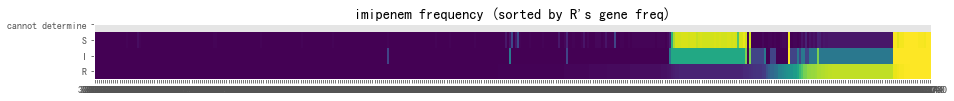

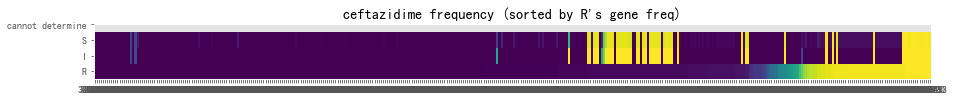

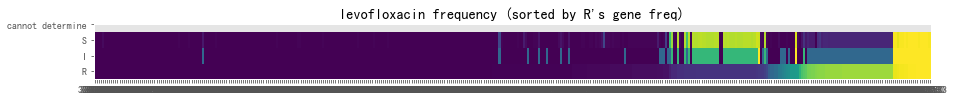

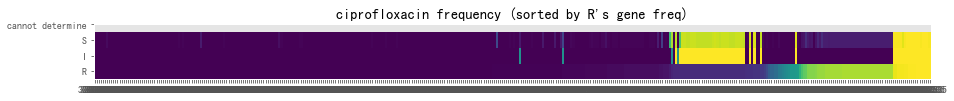

In [22]:
plot_freq('imipenem')
plot_freq('ceftazidime')
plot_freq('levofloxacin')
plot_freq('ciprofloxacin')

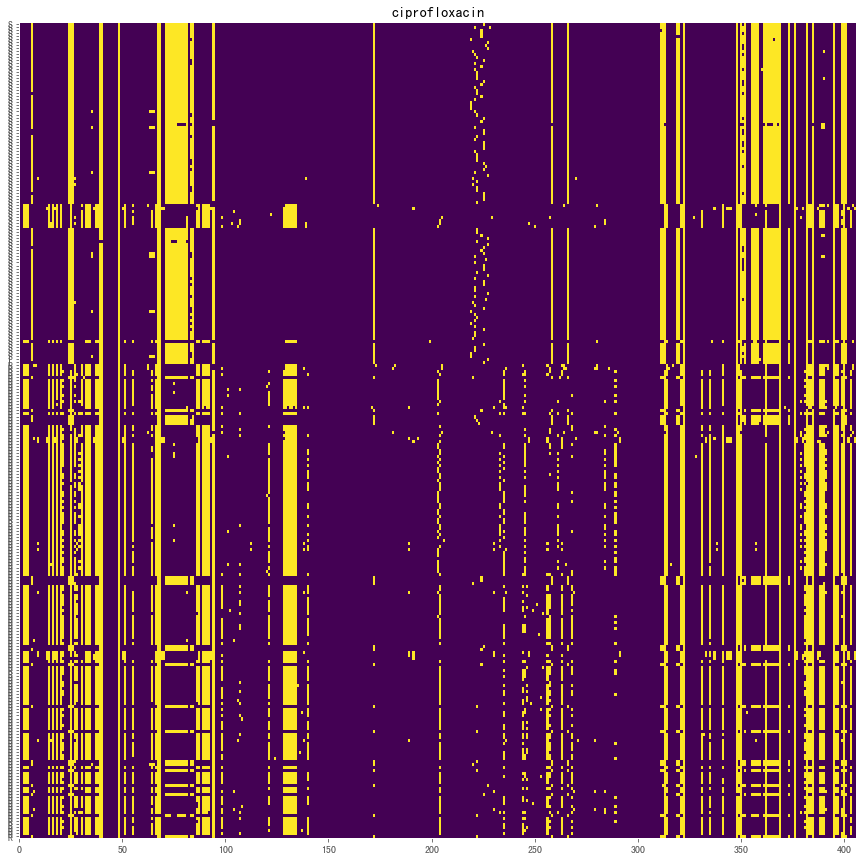

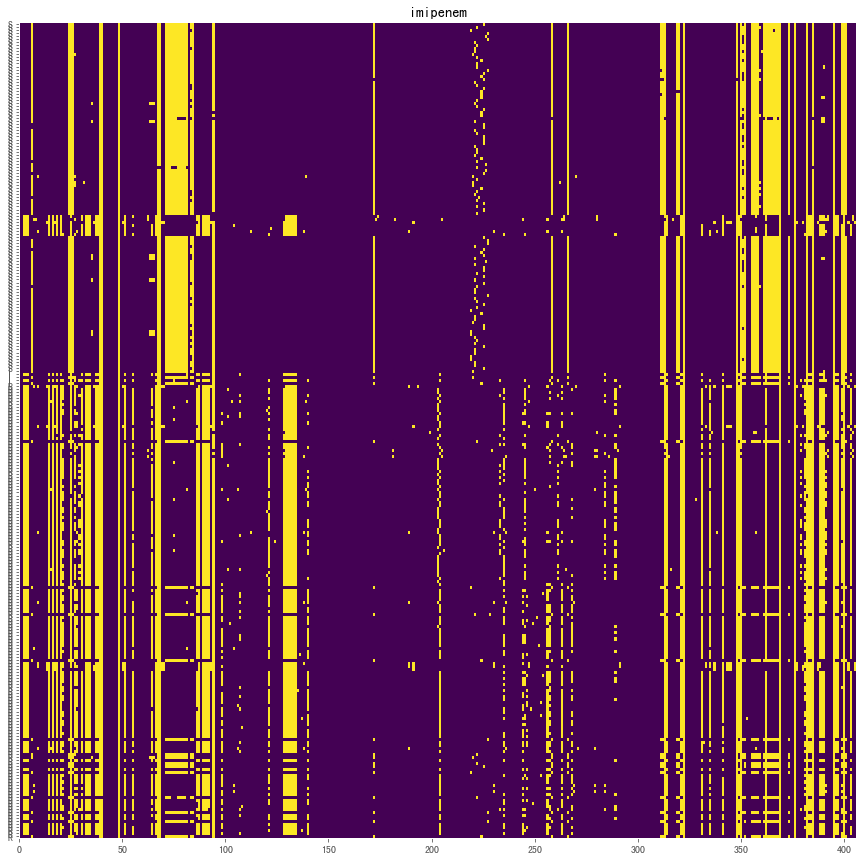

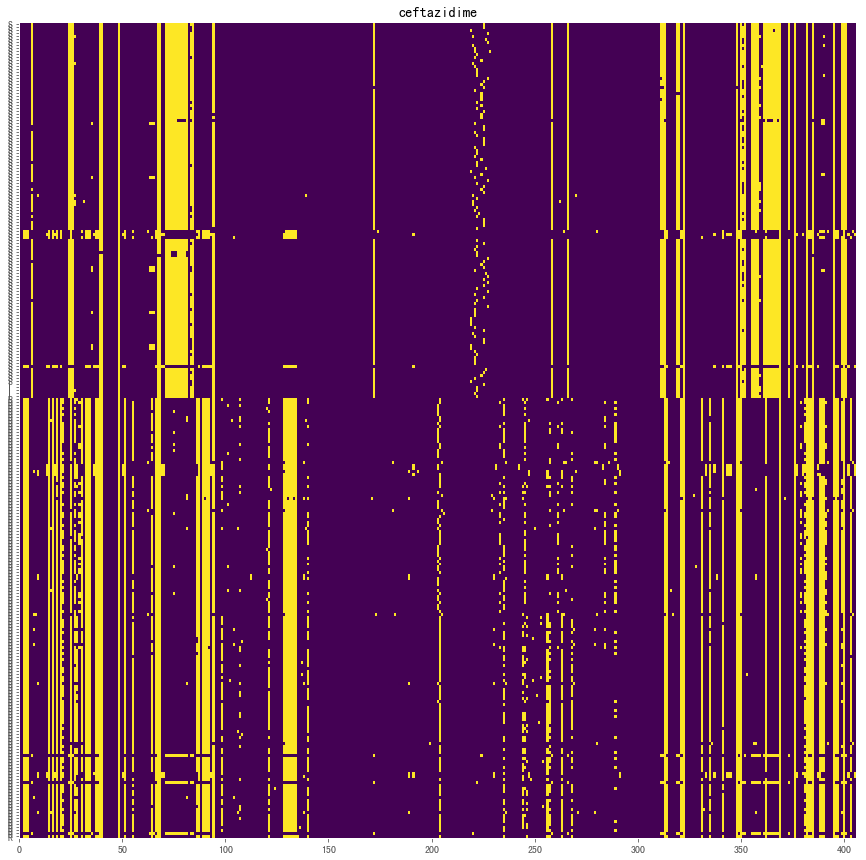

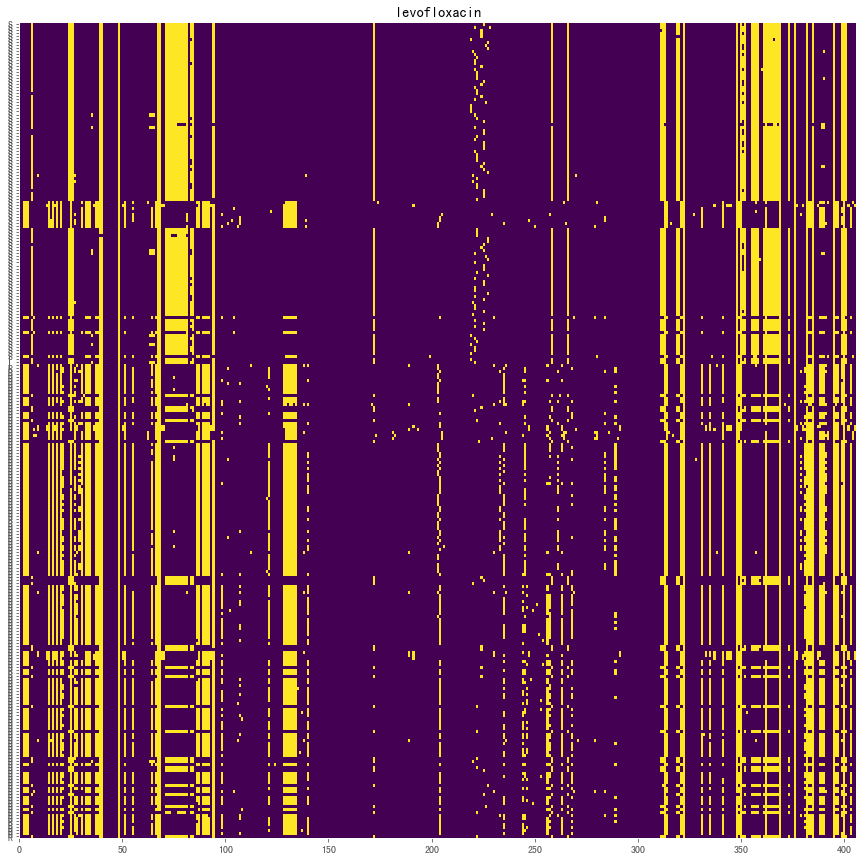

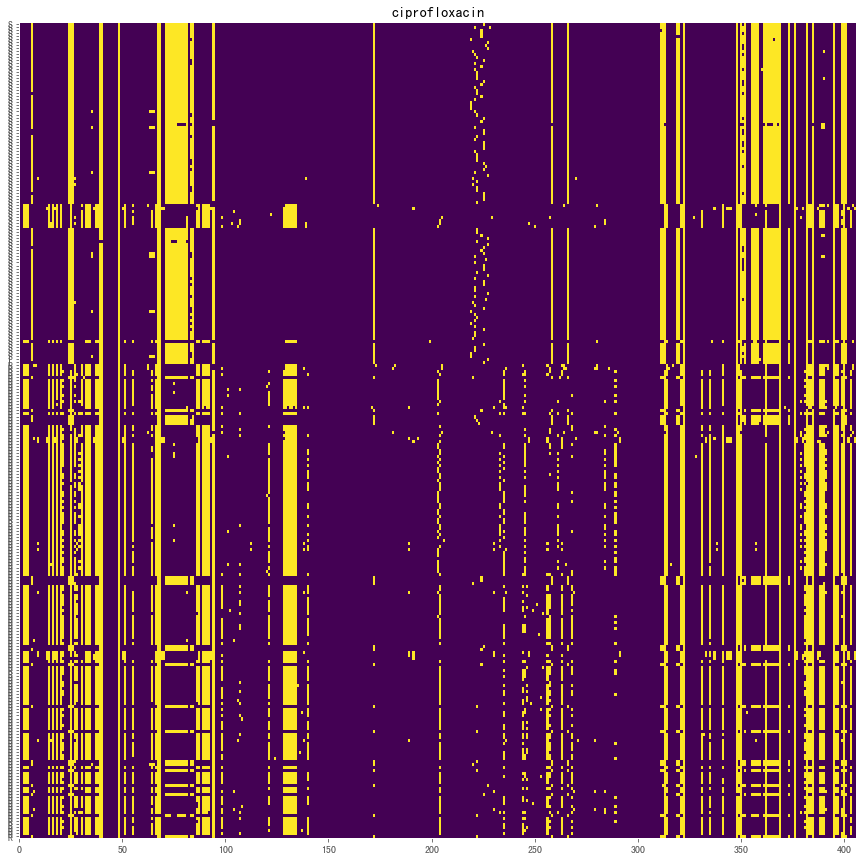

In [5]:
plot_abs_pattern('imipenem')
plot_abs_pattern('ceftazidime')
plot_abs_pattern('levofloxacin')
plot_abs_pattern('ciprofloxacin')